<a href="https://colab.research.google.com/github/tbonne/IntroDataScience/blob/main/fullNoteBooks/IntroModeling3_decisionTrees_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=1WZbnKvEzIK70qhQXyPIS36ahLWoEsqaA' width=500>

# <font color='lightblue'>Decision trees</font>

Let's take a look at decision tree as classifiers. Here we will use this algorithm to classify which grape plant was used to create a wine. 

Load in the needed libraries

In [59]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### <font color='lightblue'>Load the data</font>

Get the 'wine.csv' from the class's shared data folder and load it into a dataframe.

In [60]:
#get wine to a dataframe
df_wine = pd.read_csv('/content/wine_labs.csv')

#take a look
df_wine.head(3)



,alcohol,malic_acid,ash,total_sugar,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,plant,lab
0,14.23,1.71,2.43,2.44,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,plantA,lab1
1,13.20,1.78,2.14,2.76,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,plantA,lab2
2,13.16,2.36,2.67,1.24,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,plantA,lab3


<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100" align = 'left'>  

Q: what kinds of data are we dealing with?

In [61]:
df_wine.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
total_sugar                     float64
alcalinity_of_ash               float64
magnesium                         int64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                           int64
plant                            object
lab                              object
dtype: object

Q: are there any missing values?

In [62]:
df_wine.isna().sum() / len(df_wine)

alcohol                         0.000000
malic_acid                      0.000000
ash                             0.000000
total_sugar                     0.016854
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.000000
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
plant                           0.000000
lab                             0.000000
dtype: float64

In [63]:
#let's drop rows with missing data
df_wine = df_wine.dropna(how='any')

#take a look
df_wine.head(3)

,alcohol,malic_acid,ash,total_sugar,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,plant,lab
0,14.23,1.71,2.43,2.44,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,plantA,lab1
1,13.20,1.78,2.14,2.76,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,plantA,lab2
2,13.16,2.36,2.67,1.24,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,plantA,lab3


### <font color='lightblue'>Descriptive statistics</font> 

Let's take a little time to look at some summary statistics.
 
E.g., how many values of plant type there are? 

In [64]:
#count how many of each value in a column using value_conunts
df_wine.plant.value_counts()

plantB    70
plantA    57
plantC    48
Name: plant, dtype: int64

<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100" align = 'left'>  

Choose one feature (column) and get the mean, min, and max.

In [65]:
df_wine.total_sugar.describe()

count    175.000000
mean       2.006057
std        0.522862
min        0.690000
25%        1.680000
50%        1.970000
75%        2.375000
max        3.340000
Name: total_sugar, dtype: float64

### <font color='lightblue'>Visualizing the data</font> 

Let's plot the relationships between plant type and some of the wine measures.
 
Q: Choose one or more wine measures and generate a plot that shows the relationship between that measure and plant type.

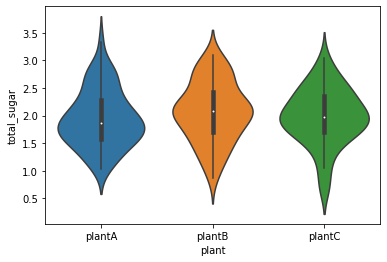

In [66]:
sns.violinplot(data=df_wine, x='plant', y='total_sugar')

### <font color='lightblue'>Data wrangling</font> 



#### Preprocessing (categorical input variables)\
> Convert the categorical 'lab' variable using onehot encoding (i.e., create dummy columns).

In [67]:
#categorical variables
cat_names = ['lab']

#create dummy variables
df_cat = pd.get_dummies(df_wine[cat_names])

#add them back to the original dataframe
df_wine = pd.concat([df_wine,df_cat], axis=1)

#remove the old columns
df_wine = df_wine.drop(cat_names, axis=1)

#take a look
df_wine

,alcohol,malic_acid,ash,total_sugar,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,plant,lab_lab1,lab_lab2,lab_lab3
0,14.23,1.71,2.43,2.44,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,plantA,1,0,0
1,13.20,1.78,2.14,2.76,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,plantA,0,1,0
2,13.16,2.36,2.67,1.24,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,plantA,0,0,1
3,14.37,1.95,2.50,1.71,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,plantA,1,0,0
4,13.24,2.59,2.87,1.97,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,plantA,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,1.86,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,plantC,0,0,1
174,13.40,3.91,2.48,2.82,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,plantC,1,0,0
175,13.27,4.28,2.26,1.06,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,plantC,0,0,1
176,13.17,2.59,2.37,2.40,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,plantC,1,0,0


#### Preprocessing (categorical target variable)
> As the target variable is categorical we will convert each category into a number, and unlike the onehot encoding we will keep these numbers within the same column.

In [68]:
#Feature Scaling (after spliting the data!)
from sklearn.preprocessing import OrdinalEncoder 

#numeric variables
target_names = ['plant']

#create the standard scaler object
ordinal_encoder = OrdinalEncoder()

#use this object to fit (i.e., to calculate the mean and sd of each variable in the training data) and then to transform the training data
df_wine[target_names] = ordinal_encoder.fit_transform(df_wine[target_names])

#take a look
df_wine

,alcohol,malic_acid,ash,total_sugar,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,plant,lab_lab1,lab_lab2,lab_lab3
0,14.23,1.71,2.43,2.44,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0.0,1,0,0
1,13.20,1.78,2.14,2.76,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0.0,0,1,0
2,13.16,2.36,2.67,1.24,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0.0,0,0,1
3,14.37,1.95,2.50,1.71,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0.0,1,0,0
4,13.24,2.59,2.87,1.97,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,1.86,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2.0,0,0,1
174,13.40,3.91,2.48,2.82,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2.0,1,0,0
175,13.27,4.28,2.26,1.06,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2.0,0,0,1
176,13.17,2.59,2.37,2.40,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2.0,1,0,0


#### Training testing split

Here we change a little how we do the data splitting. Instead of spliting the dataframe into training and testing, we'll first split the dataframe into inputs and target variables. I.e., we'd like to use X to predict y. Then we split each into training and testing sets. This makes it easier to work with sklearn algorithms.

In [69]:

#split data into predictors (X) and target (y)
X = df_wine.drop('plant', axis=1)
y = df_wine['plant']

#split these data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


#### Preprocessing (numeric variables)

In [70]:
#Feature Scaling (after spliting the data!)
from sklearn.preprocessing import StandardScaler 

#numeric variables
numb_names = X_train.drop(['lab_lab1','lab_lab2','lab_lab3'],axis=1).select_dtypes('number').columns.tolist()

#create the standard scaler object
sc = StandardScaler()

#use this object to fit (i.e., to calculate the mean and sd of each variable in the training data) and then to transform the training data
X_train[numb_names] = sc.fit_transform(X_train[numb_names])

#use the fit from the training data to transform the test data
X_test[numb_names] = sc.transform(X_test[numb_names])

#take a look
X_train


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,alcohol,malic_acid,ash,total_sugar,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,lab_lab1,lab_lab2,lab_lab3
31,0.714295,-0.604311,-0.054900,-0.437037,-0.193157,0.507959,0.935075,1.210522,-1.204311,0.647640,0.819184,0.543975,0.379779,2.476908,0,1,0
137,-0.574540,2.716688,1.000043,-1.282190,1.703966,-0.228214,-0.762795,-1.418147,2.130346,-0.830764,0.003465,-0.607069,-1.263627,-0.681377,0,1,0
165,0.898415,1.724701,-0.431666,-0.554965,0.900100,-0.817152,-1.572060,-1.550088,1.235682,-0.743799,0.698972,-0.777594,-1.180767,-0.665586,0,0,1
82,-1.126898,-1.061487,0.510248,-0.063597,1.382419,-1.553325,-0.429568,-0.423516,0.259685,-0.308974,-1.198646,1.481863,0.158817,-0.318175,0,0,1
2,0.198761,-0.000493,1.113073,-1.439427,-0.353931,0.139873,0.839868,1.261268,-0.553646,2.143438,0.295407,0.288187,0.780273,1.434674,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,0.689746,-0.561181,-0.243283,0.840520,-1.125642,1.317750,1.395246,1.312015,-0.228314,1.325967,0.488603,-0.052863,1.070286,0.202942,0,0,1
162,-0.181752,0.784471,0.773984,0.683282,0.739327,0.507959,-0.984946,-1.418147,1.886347,-1.074266,0.252474,-0.393913,-0.683602,-0.507672,0,0,1
34,0.628373,-0.483547,1.037720,0.624318,-0.225312,0.802429,0.125810,0.540668,-0.634979,-0.065472,-0.339995,0.586606,0.365969,1.150428,0,1,0
141,0.444254,0.172027,-0.092577,-1.694939,0.096234,-0.743535,-1.381645,-1.519640,0.015686,-1.630841,0.261061,-1.118644,-0.186437,0.155568,0,0,1


<img src='http://drive.google.com/uc?export=view&id=1qWrKY9TgpgQaBCzZfz1xLTV6iCeSwfmG' width="100" align = 'left'>

##<font color='lightblue'>Model building</font> 
 

Here we will build our first decision tree!

In [71]:
from sklearn.tree import DecisionTreeClassifier

#1. build the algorithm
classifier = DecisionTreeClassifier()

#2. fit the algorithm to the data
classifier_res= classifier.fit(X_train, y_train)


### Predictions

Make some predictions on the testing data

In [72]:
y_pred = classifier.predict(X_test)

Measure classification success

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[13  1  0]
 [ 1  9  1]
 [ 0  2  8]]


Text(33.0, 0.5, 'True label')

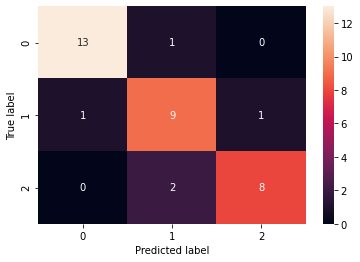

In [74]:
#more visual approach
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

More detailed metrics?

In [75]:
print('Accuracy: {:.2f}'.format(sk.metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(sk.metrics.precision_score(y_test, y_pred, average='micro')))
print('Recal: {:.2f}'.format(sk.metrics.recall_score(y_test, y_pred, average='micro')))

Accuracy: 0.86
Precision: 0.86
Recal: 0.86


<img src='http://drive.google.com/uc?export=view&id=1qWrKY9TgpgQaBCzZfz1xLTV6iCeSwfmG' width="100" align = 'left'>

##<font color='lightblue'>Hyperparameters</font> 
 

Decision tree algorithms have a number of hyperparameters that can be tuned to acheive better predictions. Let's take a look at one and how we can tune it!
 
 

First we need some way to test how model performance varies as we change the parameter. We can't use the testing dataset... if we did it really wouldn't be a good test. I.e., the testing data would be used to help build the model and so would not be independent. 

So let's split the training dataset again! This will create training and validation datasets! 

In [76]:
X_hyper_train, X_hyper_val, y_hyper_train, y_hyper_val = train_test_split(X_train, y_train, test_size=0.20)

Let's next focus on the max depth parameter, and see if we can find a value that maximizes the performance of the model on the validation dataset.


> We'll first build a function that takes as input max depth, and outputs the accuracy score.
 
> We'll then use a loop to try out many max depth scores.
 
> Finally we'll plot the the accuracy scores for each max depth value.

Let's first build a function the takes max depth as input and outputs a accuracy score.

In [77]:
def fit_decision_tree(maxDep):

  #1. build the algorithm
  classifier = DecisionTreeClassifier(max_depth=maxDep)

  #2. Fit the algorithm
  classifier_res= classifier.fit(X_hyper_train, y_hyper_train)

  #3. Make predictions
  y_pred = classifier.predict(X_hyper_val)

  #4. Meausure the accuracy
  accuracy_measured = sk.metrics.accuracy_score(y_hyper_val, y_pred)

  return accuracy_measured

Try out your new function!

In [78]:
fit_decision_tree(maxDep=4)

0.9642857142857143

Next let's build a loop and see what values of max depth give the best results!

In [79]:
acc_scores = []
for i in range(1,10):
  acc_s = fit_decision_tree(i)
  acc_scores.append(acc_s)

Then let's plot it!

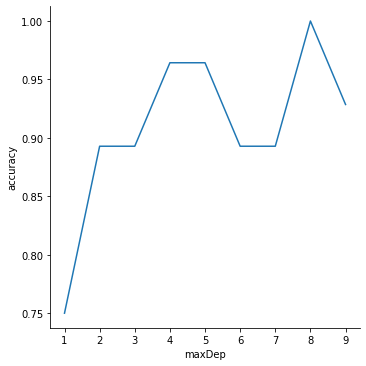

In [80]:
#create a dataframe
df_plot_maxDep = pd.DataFrame({'accuracy':acc_scores, 'maxDep':range(1,10)})

#make a plot
sns.relplot(data=df_plot_maxDep, x='maxDep',y='accuracy', kind='line')

####<font color='lightblue'>bonus</font> 
 

Try this exercise again but this time use min_samples_split. Which is the parameter that defines when splits are no longer considered (e.g., if a leaf has 10 points in it and min_samples_split is 11 then the algorithm will not look to split the leaf.



<img src='http://drive.google.com/uc?export=view&id=1qWrKY9TgpgQaBCzZfz1xLTV6iCeSwfmG' width="100" align = 'left'>

## <font color='lightblue'>Model interpretation</font> 

Decision trees can offer some nice visuals that can help interpret and communicate your results, lets take a look at a few

In [81]:
!pip install dtreeviz
from dtreeviz.trees import dtreeviz 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


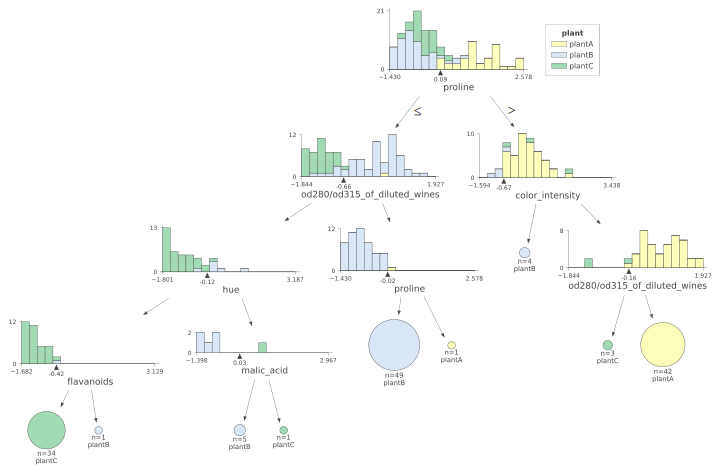

In [82]:
#build the figure
viz = dtreeviz(classifier_res, X_train, y_train,
                target_name="plant",
                feature_names=X_train.columns.to_list(),
                class_names={0:'plantA',1:'plantB',2:'plantC'},
                scale=1.0)

#take a look
viz

Let's look at how the tree does with the test data

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


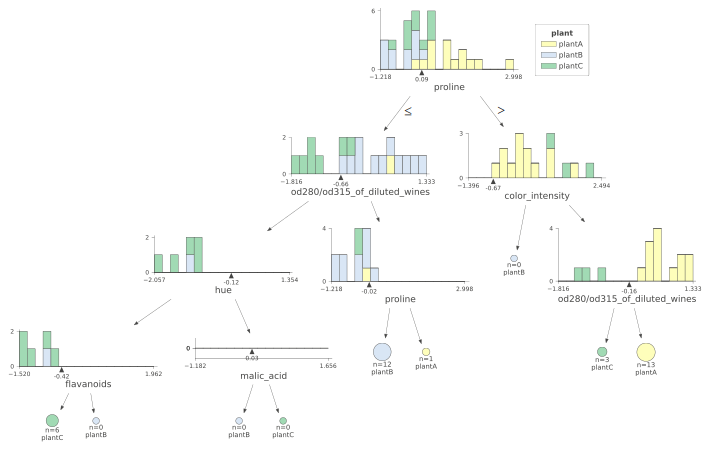

In [83]:
#build the figure
viz_test = dtreeviz(classifier_res, X_test, y_test,
                target_name="plant",
                feature_names=X_train.columns.to_list(),
                class_names={0:'plantA',1:'plantB',2:'plantC'},
                scale=1)

#take a look
viz_test

In [84]:
#Vizualize one prediction 
import numpy as np
# pick random X test point
X_values_for_pred = X_test.iloc[12] #you can choose any other row!

X_values_for_pred

alcohol                        -0.083555
malic_acid                      0.387676
ash                             1.226102
total_sugar                    -0.397727
alcalinity_of_ash               0.417780
magnesium                      -0.228214
total_phenols                  -1.159493
flavanoids                     -1.519640
nonflavanoid_phenols            1.317015
proanthocyanins                -1.439518
color_intensity                -0.168265
hue                            -0.820225
od280/od315_of_diluted_wines   -0.407399
proline                        -0.412923
lab_lab1                        0.000000
lab_lab2                        1.000000
lab_lab3                        0.000000
Name: 140, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


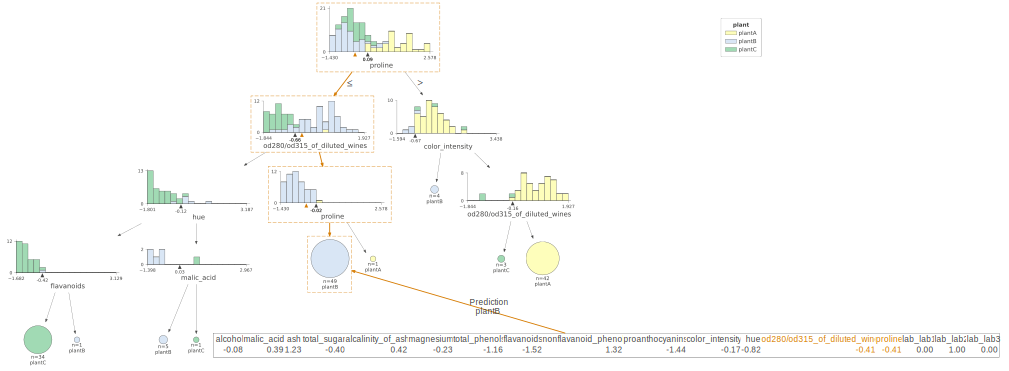

In [85]:
#build the figure
viz_one_pred = dtreeviz(classifier_res, X_train, y_train,
                target_name="plant",
                feature_names=X_train.columns.to_list(),
                class_names={0:'plantA',1:'plantB',2:'plantC'},
                scale=0.75,
                X=X_values_for_pred)

#take a look
viz_one_pred

In [86]:
y_test.iloc[12]

2.0

## <font color='lightblue'>Bonus 2</font> 

Now that you know how to use decision tree models, try going back to one of the datasets we've already worked on and see if you can get better predictions? Can you still explain what features are helping you to make those predictions?

In [87]:
#load a dataset